In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [3]:
df = pd.read_csv("/kaggle/input/survey-dataset/Survey_AI.csv")

In [4]:
df.head()

,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,...,9,3,1,2,3,1,2,2,1,9.2
1,2,7,Internet;Social media,1,0,1,0,0,2,3,...,6,2,2,1,2,2,2,2,1,7.7
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,...,6,3,3,3,4,2,2,2,0,7.2
3,4,5,Internet;Social media,1,0,1,0,0,4,4,...,9,1,2,2,3,1,2,2,1,8.2
4,5,4,Internet,1,0,0,0,0,1,2,...,8,3,2,3,4,1,2,2,1,7.7


In [5]:
df.info()  # Shows the data type and non-null counts for each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    91 non-null     int64  
 1   Q1.AI_knowledge                       91 non-null     int64  
 2   Q2.AI_sources                         91 non-null     object 
 3   Q2#1.Internet                         91 non-null     int64  
 4   Q2#2.Books/Papers                     91 non-null     int64  
 5   Q2#3.Social_media                     91 non-null     int64  
 6   Q2#4.Discussions                      91 non-null     int64  
 7   Q2#5.NotInformed                      91 non-null     int64  
 8   Q3#1.AI_dehumanization                91 non-null     int64  
 9   Q3#2.Job_replacement                  91 non-null     int64  
 10  Q3#3.Problem_solving                  91 non-null     int64  
 11  Q3#4.AI_rulling_socie

In [6]:
print("Columns in DataFrame:", df.columns.tolist())


Columns in DataFrame: ['ID', 'Q1.AI_knowledge', 'Q2.AI_sources', 'Q2#1.Internet', 'Q2#2.Books/Papers', 'Q2#3.Social_media', 'Q2#4.Discussions', 'Q2#5.NotInformed', 'Q3#1.AI_dehumanization', 'Q3#2.Job_replacement', 'Q3#3.Problem_solving', 'Q3#4.AI_rulling_society', 'Q4#1.AI_costly', 'Q4#2.Economic_crisis', 'Q4#3.Economic_growth', 'Q4#4.Job_loss', 'Q5.Feelings', 'Q6.Domains', 'Q6#1.Education', 'Q6#2.Medicine', 'Q6#3.Agriculture', 'Q6#4.Constructions', 'Q6#5.Marketing', 'Q6#6.Administration', 'Q6#7.Art', 'Q7.Utility_grade', 'Q8.Advantage_teaching', 'Q9.Advantage_learning', 'Q10.Advantage_evaluation ', 'Q11.Disadvantage_educational_process', 'Q12.Gender', 'Q13.Year_of_study', 'Q14.Major', 'Q15.Passed_exams', 'Q16.GPA']


In [7]:
# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Now let's select the intended numerical columns
numeric_features = ['Q1.AI_knowledge', 'Q7.Utility_grade', 'Q8.Advantage_teaching', 
                    'Q9.Advantage_learning', 'Q10.Advantage_evaluation', 
                    'Q11.Disadvantage_educational_process', 'Q16.GPA']

# Check if all selected features exist in the cleaned column names
numeric_features = [col for col in numeric_features if col in df.columns]

print("Verified numeric features:", numeric_features)

# Standardize the verified numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


Verified numeric features: ['Q1.AI_knowledge', 'Q7.Utility_grade', 'Q8.Advantage_teaching', 'Q9.Advantage_learning', 'Q10.Advantage_evaluation', 'Q11.Disadvantage_educational_process', 'Q16.GPA']


In [8]:
# Create dummy variables with a prefix for 'Q2.AI_sources' to avoid column name conflicts
q2_dummies = df['Q2.AI_sources'].str.get_dummies(sep=';').add_prefix('Q2.AI_sources_')
df = df.join(q2_dummies)

# Create dummy variables with a prefix for 'Q6.Domains' to avoid column name conflicts
q6_dummies = df['Q6.Domains'].str.get_dummies(sep=';').add_prefix('Q6.Domains_')
df = df.join(q6_dummies)

# Drop the original categorical columns, as they are now encoded
df = df.drop(['Q2.AI_sources', 'Q6.Domains'], axis=1)

# Display the updated DataFrame
print(df.head())


   ID  Q1.AI_knowledge  Q2#1.Internet  Q2#2.Books/Papers  Q2#3.Social_media  \
0   1         1.065702              1                  1                  0   
1   2         0.555287              1                  0                  1   
2   3        -0.465543              1                  1                  0   
3   4        -0.465543              1                  0                  1   
4   5        -0.975958              1                  0                  0   

   Q2#4.Discussions  Q2#5.NotInformed  Q3#1.AI_dehumanization  \
0                 0                 0                       1   
1                 0                 0                       2   
2                 0                 0                       2   
3                 0                 0                       4   
4                 0                 0                       1   

   Q3#2.Job_replacement  Q3#3.Problem_solving  ...  Q2.AI_sources_Internet  \
0                     2                     5  ...      

In [9]:
print(df.columns)


Index(['ID', 'Q1.AI_knowledge', 'Q2#1.Internet', 'Q2#2.Books/Papers',
       'Q2#3.Social_media', 'Q2#4.Discussions', 'Q2#5.NotInformed',
       'Q3#1.AI_dehumanization', 'Q3#2.Job_replacement',
       'Q3#3.Problem_solving', 'Q3#4.AI_rulling_society', 'Q4#1.AI_costly',
       'Q4#2.Economic_crisis', 'Q4#3.Economic_growth', 'Q4#4.Job_loss',
       'Q5.Feelings', 'Q6#1.Education', 'Q6#2.Medicine', 'Q6#3.Agriculture',
       'Q6#4.Constructions', 'Q6#5.Marketing', 'Q6#6.Administration',
       'Q6#7.Art', 'Q7.Utility_grade', 'Q8.Advantage_teaching',
       'Q9.Advantage_learning', 'Q10.Advantage_evaluation',
       'Q11.Disadvantage_educational_process', 'Q12.Gender',
       'Q13.Year_of_study', 'Q14.Major', 'Q15.Passed_exams', 'Q16.GPA',
       'Q2.AI_sources_Books/Scientific papers (physical/online format)',
       'Q2.AI_sources_Discussions with family/friends',
       'Q2.AI_sources_I don't inform myself about AI',
       'Q2.AI_sources_Internet', 'Q2.AI_sources_Social media',
      

Removing the ID column from the DataFrame

In [10]:
# Drop only if the 'ID' column exists
if 'ID' in df.columns:
    df = df.drop(['ID'], axis=1)


In [11]:
print(df.head())

   Q1.AI_knowledge  Q2#1.Internet  Q2#2.Books/Papers  Q2#3.Social_media  \
0         1.065702              1                  1                  0   
1         0.555287              1                  0                  1   
2        -0.465543              1                  1                  0   
3        -0.465543              1                  0                  1   
4        -0.975958              1                  0                  0   

   Q2#4.Discussions  Q2#5.NotInformed  Q3#1.AI_dehumanization  \
0                 0                 0                       1   
1                 0                 0                       2   
2                 0                 0                       2   
3                 0                 0                       4   
4                 0                 0                       1   

   Q3#2.Job_replacement  Q3#3.Problem_solving  Q3#4.AI_rulling_society  ...  \
0                     2                     5                        1  ...   


Selecting only numerical columns (recheck to exclude any categorical)

In [12]:
from sklearn.preprocessing import StandardScaler


numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [13]:
# Check the standardized data
print(df.head())

   Q1.AI_knowledge  Q2#1.Internet  Q2#2.Books/Papers  Q2#3.Social_media  \
0         1.065702       0.479301           1.357848          -0.885615   
1         0.555287       0.479301          -0.736460           1.129159   
2        -0.465543       0.479301           1.357848          -0.885615   
3        -0.465543       0.479301          -0.736460           1.129159   
4        -0.975958       0.479301          -0.736460          -0.885615   

   Q2#4.Discussions  Q2#5.NotInformed  Q3#1.AI_dehumanization  \
0         -0.496564         -0.265684               -1.305844   
1         -0.496564         -0.265684               -0.444744   
2         -0.496564         -0.265684               -0.444744   
3         -0.496564         -0.265684                1.277456   
4         -0.496564         -0.265684               -1.305844   

   Q3#2.Job_replacement  Q3#3.Problem_solving  Q3#4.AI_rulling_society  ...  \
0             -0.992880              0.795927                -1.193917  ...   


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

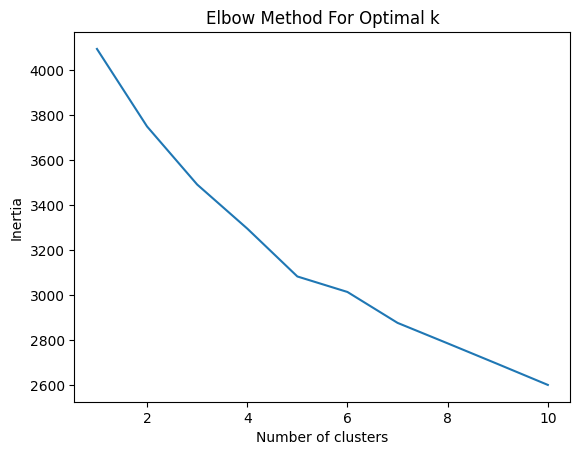

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_features])
    inertia.append(kmeans.inertia_)

# Plotting the inertia values
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


By seeing the Above Graph which we got using the Elbow Method , we can choose 5 clusters as optimized number.


In [15]:
from sklearn.cluster import KMeans

# Fit the KMeans model (assuming `df` is your preprocessed data)
# Let's assume you choose 3 clusters (you can optimize this number using the Elbow Method)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# View the clustered data
print(df[['Cluster']].head())


   Cluster
0        1
1        2
2        4
3        1
4        1


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Applying PCA to reduce the data into 2D to plot the clusters
. 

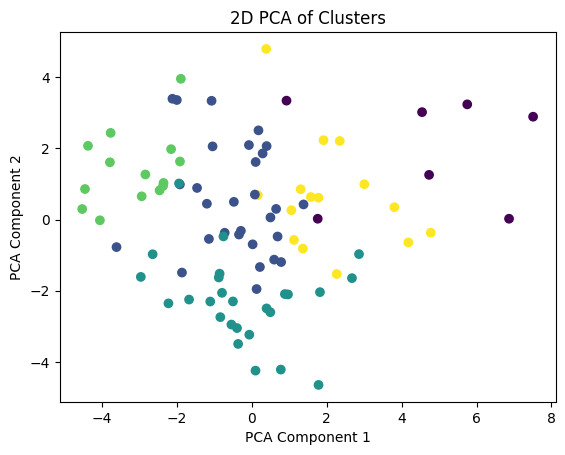

In [16]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[numeric_features])

# Adding the PCA components to the DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plot the clusters
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.title('2D PCA of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [17]:
# Calculate the mean of each feature per cluster
cluster_means = df.groupby('Cluster')[numeric_features].mean()
print(cluster_means)


         Q1.AI_knowledge  Q2#1.Internet  Q2#2.Books/Papers  Q2#3.Social_media  \
Cluster                                                                         
0              -1.413457      -2.086370          -0.437273          -0.885615   
1              -0.183935       0.213887          -0.158720          -0.329815   
2               0.201922       0.183262          -0.172608           0.586720   
3               0.883411       0.112777           0.909067           0.409597   
4              -0.159294       0.137212          -0.038357          -0.348342   

         Q2#4.Discussions  Q2#5.NotInformed  Q3#1.AI_dehumanization  \
Cluster                                                               
0               -0.496564          3.188214                0.416356   
1               -0.323432         -0.265684               -0.325972   
2                0.372423         -0.265684                0.350118   
3                0.400010         -0.265684               -0.567758   
4     

Grouping  features for clearer analysis

In [18]:

knowledge_features = ['Q1.AI_knowledge', 'Q7.Utility_grade']
source_features = ['Q2#1.Internet', 'Q2#2.Books/Papers', 'Q2#3.Social_media', 'Q2#4.Discussions', 'Q2#5.NotInformed']
perception_features = ['Q3#1.AI_dehumanization', 'Q3#2.Job_replacement', 'Q3#3.Problem_solving', 'Q3#4.AI_rulling_society']
domain_features = ['Q6.Domains_Education', 'Q6.Domains_Medicine', 'Q6.Domains_Marketing', 'Q6.Domains_Public Administration']

# Calculate mean values for each feature group per cluster
print("Knowledge Features by Cluster:")
print(cluster_means[knowledge_features])

print("\nSource Features by Cluster:")
print(cluster_means[source_features])

print("\nPerception Features by Cluster:")
print(cluster_means[perception_features])

print("\nDomain Features by Cluster:")
print(cluster_means[domain_features])


Knowledge Features by Cluster:
         Q1.AI_knowledge  Q7.Utility_grade
Cluster                                   
0              -1.413457         -0.935599
1              -0.183935          0.485341
2               0.201922         -0.526594
3               0.883411          0.892143
4              -0.159294         -0.421616

Source Features by Cluster:
         Q2#1.Internet  Q2#2.Books/Papers  Q2#3.Social_media  \
Cluster                                                        
0            -2.086370          -0.437273          -0.885615   
1             0.213887          -0.158720          -0.329815   
2             0.183262          -0.172608           0.586720   
3             0.112777           0.909067           0.409597   
4             0.137212          -0.038357          -0.348342   

         Q2#4.Discussions  Q2#5.NotInformed  
Cluster                                      
0               -0.496564          3.188214  
1               -0.323432         -0.265684  
2     

Applying t-SNE also for 2D visualization of clusters


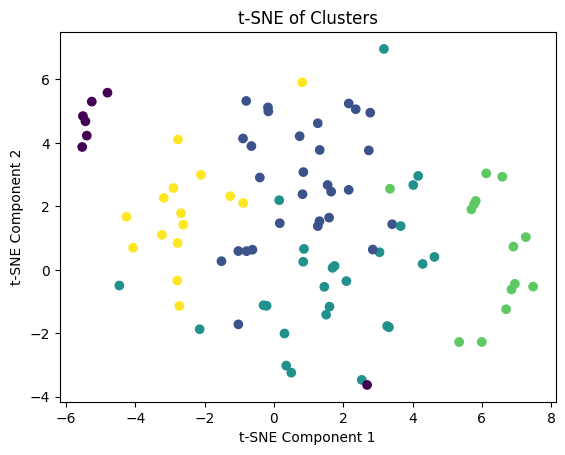

In [19]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df[numeric_features])

# Adding the t-SNE components to the DataFrame
df['TSNE1'] = tsne_components[:, 0]
df['TSNE2'] = tsne_components[:, 1]

# Plot the t-SNE clusters
plt.scatter(df['TSNE1'], df['TSNE2'], c=df['Cluster'], cmap='viridis')
plt.title('t-SNE of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


Ploting the distribution of a key feature by cluster

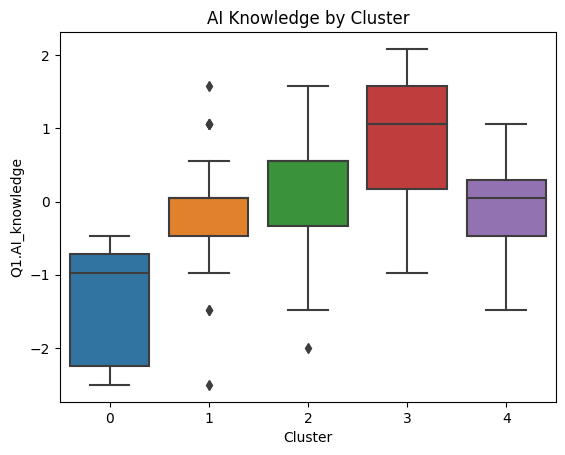

In [20]:
import seaborn as sns

# Adding cluster labels to the dataframe
df['Cluster'] = kmeans.labels_


sns.boxplot(x='Cluster', y='Q1.AI_knowledge', data=df)
plt.title('AI Knowledge by Cluster')
plt.show()


Interpretation of Each Cluster:::

Let’s analyze each cluster’s profile by feature group.



Cluster 0

Knowledge: Very low AI knowledge (Q1.AI_knowledge: -1.413457) and utility rating (Q7.Utility_grade: -0.935599), suggesting limited AI familiarity and interest.

Preferred Sources: Extremely low internet and social media engagement, but high scores for Q2#5.NotInformed (3.188214), indicating that this group is largely uninformed about AI topics.

Perceptions: Moderate scores for Q3#1.AI_dehumanization and Q3#2.Job_replacement show some concern about AI’s role and impact, but it's not strong.
Domains of Interest: Higher interest in marketing (Q6.Domains_Marketing: 0.731441) but low interest in education and medicine.

Insight for Cluster 0: This group has minimal knowledge of AI and is largely uninformed. To engage this segment:

Strategy: Provide basic, introductory content about AI, possibly linked to marketing-related applications.
Channels: Consider traditional or non-digital channels, as they show low digital engagement.


Cluster 1

Knowledge: Moderate knowledge and utility rating (Q1.AI_knowledge: -0.183935, Q7.Utility_grade: 0.485341), indicating some familiarity with AI.

Preferred Sources: Slight internet engagement and low social media scores, with a mix of book/paper use.

Perceptions: Lower concern about AI’s impact on jobs and society, indicating a more neutral or balanced view of AI.

Domains of Interest: Higher interest in education and medicine (Q6.Domains_Education: 0.554581, Q6.Domains_Medicine: 0.496564) and lower in marketing.

Insight for Cluster 1: This group is moderately knowledgeable and interested in educational and medical applications of AI.

Strategy: Engage with intermediate-level content on AI, especially in applications for education and medicine.
Channels: Digital and academic channels could be effective, focusing on practical use cases in healthcare and education.


Cluster 2

Knowledge: Slightly above average AI knowledge and lower utility rating (Q1.AI_knowledge: 0.201922, Q7.Utility_grade: -0.526594), suggesting curiosity but low perceived usefulness.

Preferred Sources: Higher engagement with social media (Q2#3.Social_media: 0.586720) and discussions, suggesting a preference for social learning.

Perceptions: Higher concern for job replacement (Q3#2.Job_replacement: 0.537431), indicating anxiety about AI’s impact on employment.

Domains of Interest: Low interest in education but moderate in public administration.
Insight for Cluster 2: This group is moderately informed but concerned about AI’s impact on jobs.

Strategy: Provide content that addresses job security in an AI-driven world, such as reskilling opportunities or future-of-work webinars.
Channels: Social media could be an effective channel, given their engagement with social learning platforms.


Cluster 3

Knowledge: High AI knowledge and utility rating (Q1.AI_knowledge: 0.883411, Q7.Utility_grade: 0.892143), suggesting this group is well-versed and sees value in AI.

Preferred Sources: Engages with internet, books/papers, and social media, indicating a well-rounded approach to information gathering.

Perceptions: Lower concerns about job replacement and AI’s societal role, suggesting confidence in AI’s benefits.
Domains of Interest: High interest in education, medicine, and marketing, showing a broad interest in various AI applications.
Insight for Cluster 3: This group is highly knowledgeable and open to various AI applications.

Strategy: Engage with advanced content about cutting-edge AI applications in multiple fields, especially in education, healthcare, and marketing.

Channels: Use a variety of digital platforms, including online courses, webinars, and research publications.


Cluster 4

Knowledge: Lower AI knowledge and utility rating (Q1.AI_knowledge: -0.159294, Q7.Utility_grade: -0.421616).

Preferred Sources: Low engagement with most sources but some reliance on social media.

Perceptions: Slightly concerned about AI’s role in society.

Domains of Interest: Higher interest in public administration and art, indicating a unique, non-technical perspective on AI.

Insight for Cluster 4: This group has limited AI knowledge but is interested in social and artistic domains.

Strategy: Provide introductory content on AI applications in public administration and the arts, such as AI in policy-making or digital art.

Channels: Social media campaigns featuring AI's impact in social contexts may engage this group.


**Summary of recommended strategies for each cluster:
Cluster 0:Focus on awareness with introductory AI content, possibly in marketing.Use non-digital channels due to low online engagement.
Cluster 1:Target intermediate-level content focused on educational and healthcare applications.Utilize digital and academic channels to reach this segment effectively.
Cluster 2:Address job security concerns through content focused on AI’s future impact on employment.Leverage social media platforms for this socially inclined group.
Cluster 3:Engage with advanced content covering diverse AI applications across fields.Use multiple digital platforms, including webinars, online courses, and research-focused content.
Cluster 4:Highlight AI applications in social and artistic fields, appealing to their interest in public administration and art.Focus on social media campaigns to deliver content in an accessible format.**
